Training Perceptron for OR gate...
Epoch 100/1000, Loss: 0.2948
Epoch 200/1000, Loss: 0.2356
Epoch 300/1000, Loss: 0.1955
Epoch 400/1000, Loss: 0.1665
Epoch 500/1000, Loss: 0.1446
Epoch 600/1000, Loss: 0.1275
Epoch 700/1000, Loss: 0.1138
Epoch 800/1000, Loss: 0.1026
Epoch 900/1000, Loss: 0.0934
Epoch 1000/1000, Loss: 0.0856


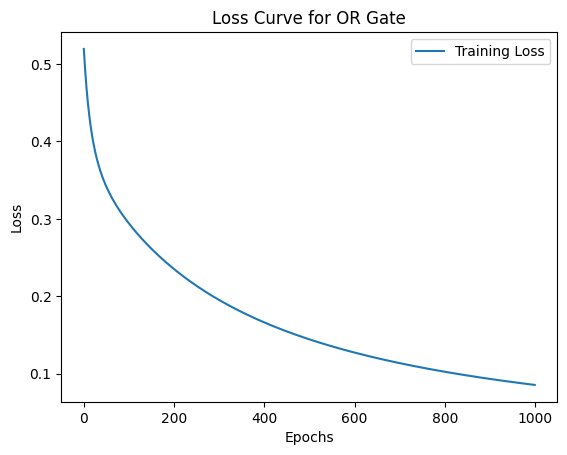

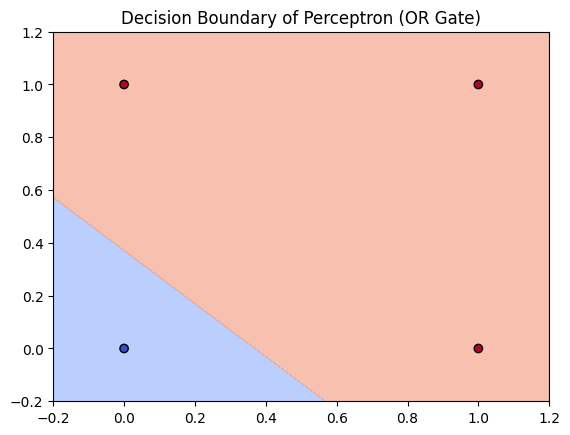

Training Perceptron for AND gate...
Epoch 100/1000, Loss: 0.4449
Epoch 200/1000, Loss: 0.3527
Epoch 300/1000, Loss: 0.2948
Epoch 400/1000, Loss: 0.2544
Epoch 500/1000, Loss: 0.2243
Epoch 600/1000, Loss: 0.2009
Epoch 700/1000, Loss: 0.1819
Epoch 800/1000, Loss: 0.1663
Epoch 900/1000, Loss: 0.1531
Epoch 1000/1000, Loss: 0.1419


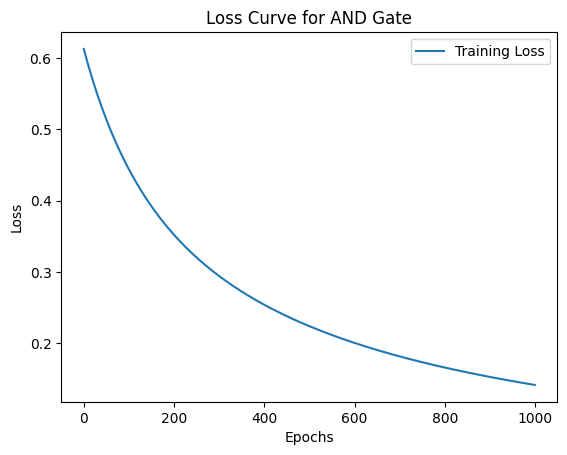

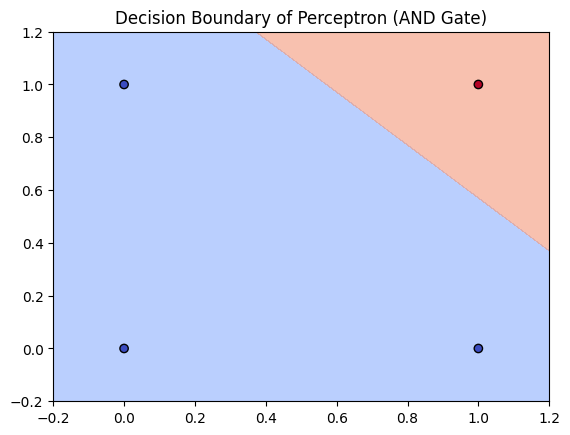

Training Perceptron for NOR gate...
Epoch 100/1000, Loss: 0.2932
Epoch 200/1000, Loss: 0.2345
Epoch 300/1000, Loss: 0.1948
Epoch 400/1000, Loss: 0.1659
Epoch 500/1000, Loss: 0.1441
Epoch 600/1000, Loss: 0.1271
Epoch 700/1000, Loss: 0.1135
Epoch 800/1000, Loss: 0.1024
Epoch 900/1000, Loss: 0.0932
Epoch 1000/1000, Loss: 0.0854


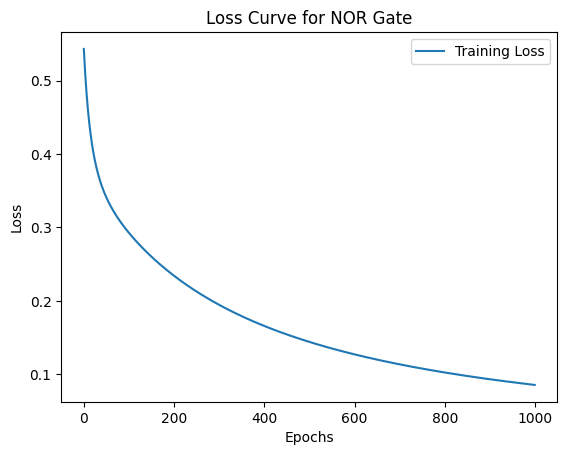

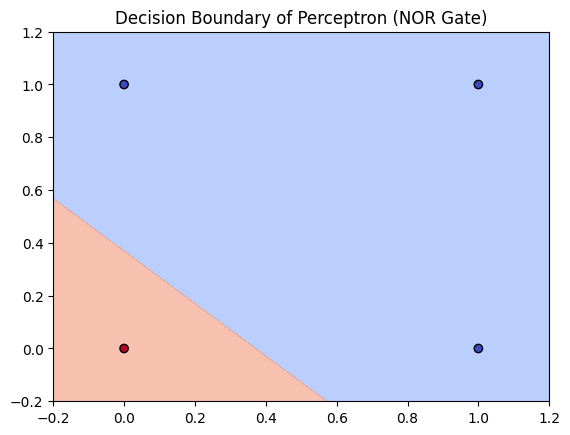

Training Perceptron for NAND gate...
Epoch 100/1000, Loss: 0.4638
Epoch 200/1000, Loss: 0.3631
Epoch 300/1000, Loss: 0.3014
Epoch 400/1000, Loss: 0.2591
Epoch 500/1000, Loss: 0.2278
Epoch 600/1000, Loss: 0.2036
Epoch 700/1000, Loss: 0.1842
Epoch 800/1000, Loss: 0.1682
Epoch 900/1000, Loss: 0.1547
Epoch 1000/1000, Loss: 0.1432


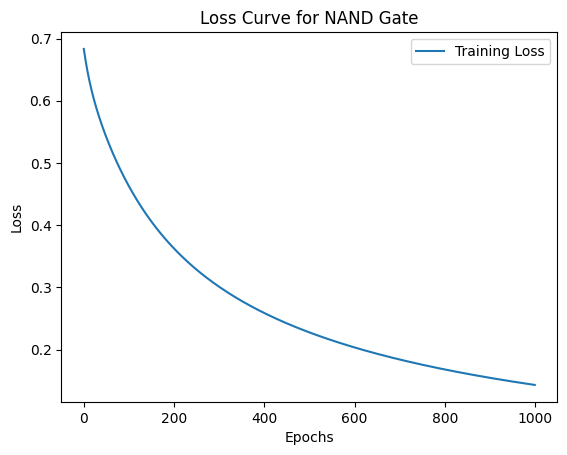

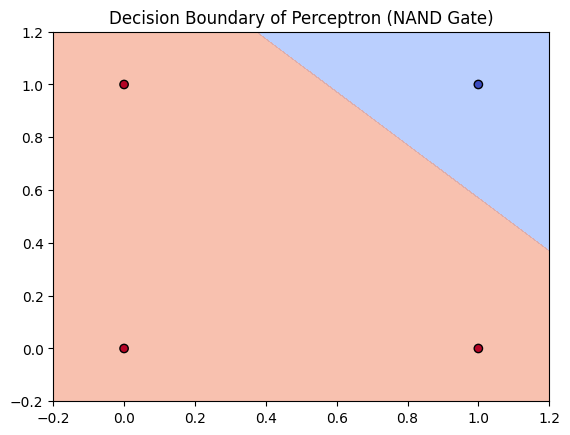

Training Perceptron for XNOR gate...
Epoch 100/1000, Loss: 0.6964
Epoch 200/1000, Loss: 0.6943
Epoch 300/1000, Loss: 0.6936
Epoch 400/1000, Loss: 0.6933
Epoch 500/1000, Loss: 0.6932
Epoch 600/1000, Loss: 0.6932
Epoch 700/1000, Loss: 0.6932
Epoch 800/1000, Loss: 0.6932
Epoch 900/1000, Loss: 0.6931
Epoch 1000/1000, Loss: 0.6931


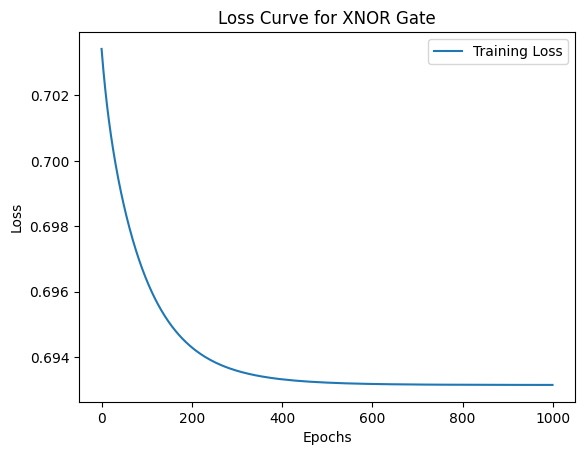

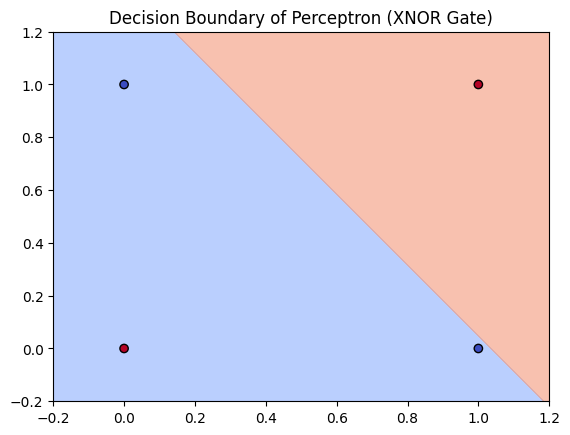

Training Perceptron for XOR gate...
Epoch 100/1000, Loss: 0.6937
Epoch 200/1000, Loss: 0.6934
Epoch 300/1000, Loss: 0.6933
Epoch 400/1000, Loss: 0.6932
Epoch 500/1000, Loss: 0.6932
Epoch 600/1000, Loss: 0.6932
Epoch 700/1000, Loss: 0.6932
Epoch 800/1000, Loss: 0.6931
Epoch 900/1000, Loss: 0.6931
Epoch 1000/1000, Loss: 0.6931


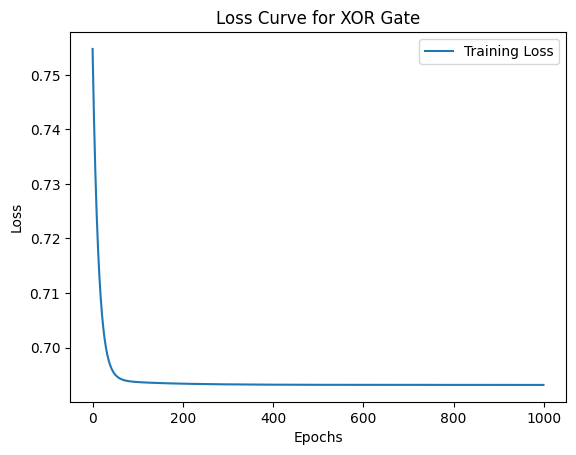

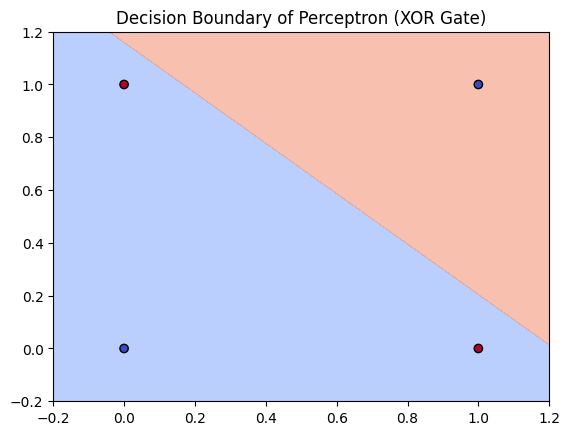

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Define the Logic Gate Datasets
datasets = {
    "OR": {
        "X": np.array([[0,0], [0,1], [1,0], [1,1]]),
        "y": np.array([[0], [1], [1], [1]])
    },
    "AND": {
        "X": np.array([[0,0], [0,1], [1,0], [1,1]]),
        "y": np.array([[0], [0], [0], [1]])
    },
    "NOR": {
        "X": np.array([[0,0], [0,1], [1,0], [1,1]]),
        "y": np.array([[1], [0], [0], [0]])
    },
    "NAND": {
        "X": np.array([[0,0], [0,1], [1,0], [1,1]]),
        "y": np.array([[1], [1], [1], [0]])
    },
    "XNOR": {
        "X": np.array([[0,0], [0,1], [1,0], [1,1]]),
        "y": np.array([[1], [0], [0], [1]])
    },
    "XOR": {
        "X": np.array([[0,0], [0,1], [1,0], [1,1]]),
        "y": np.array([[0], [1], [1], [0]])
    },
}

# Step 2: Define the Perceptron Model
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # Single-layer perceptron
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.activation(x)
        return x

# Step 3: Training Function
def train_perceptron(X_train, y_train, num_epochs=1000, lr=0.1):
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)

    model = Perceptron()
    criterion = nn.BCELoss()  # Binary cross-entropy loss for classification
    optimizer = optim.SGD(model.parameters(), lr=lr)

    losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

    return model, losses

# Step 4: Plot Decision Boundary
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.show()

# Train and Plot for AND Gates
for gate, data in datasets.items():
    print(f'Training Perceptron for {gate} gate...')
    model, losses = train_perceptron(data["X"], data["y"])
    plt.plot(range(len(losses)), losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve for {gate} Gate')
    plt.legend()
    plt.show()
    plot_decision_boundary(model, data["X"], data["y"], f'Decision Boundary of Perceptron ({gate} Gate)')
